# 使用TensorFlow实现稀疏自编码

In [1]:
# 使用的数据库还是MNist，包含60000张训练图片，10000张测试图片，
# 每个图像大小是28*28，被向量化成一个向量，维度是1*28×28，每个像素值被归一化成0-1之间

from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

import tensorflow as tf
import numpy as np

In [2]:
# 读入数据
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# 设置学习参数和网络参数
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
example_to_show = 10

num_hidden_1 = 256
num_hidden_2 = 128
num_input = 784

X = tf.placeholder(dtype=tf.float32, shape=[None, 784])

Weights = {
    'encoder_b1':tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_b2':tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_b1':tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_b2':tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}

biases = {
    'encoder_b1' : tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2' : tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1' : tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2' : tf.Variable(tf.random_normal([num_input]))
}

In [4]:
# 定义编码和解码网络
def coder(X):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, Weights['encoder_b1']),biases['encoder_b1']))
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, Weights['encoder_b2']), biases['encoder_b2']))
    return layer2

def decoder(X):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X, Weights['decoder_b1']), biases['decoder_b1']))
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, Weights['decoder_b2']), biases['decoder_b2']))
    return layer2

encoder_op = coder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op
y_true = X

loss = tf.reduce_mean(tf.pow(y_pred - y_true, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

In [5]:
# 开始训练
sess = tf.Session()

sess.run(init)

for i in range(1, num_steps + 1):
    batch_x, _ = mnist.train.next_batch(batch_size)
    
    _, l = sess.run([optimizer, loss], feed_dict={X:batch_x})
    
    if i % display_step == 0:
        print('Step %i' % i + " Minibatch Loss %f" % l)

Step 1000 Minibatch Loss 0.143589
Step 2000 Minibatch Loss 0.128189
Step 3000 Minibatch Loss 0.115562
Step 4000 Minibatch Loss 0.109977
Step 5000 Minibatch Loss 0.103183
Step 6000 Minibatch Loss 0.098253
Step 7000 Minibatch Loss 0.094261
Step 8000 Minibatch Loss 0.089432
Step 9000 Minibatch Loss 0.089975
Step 10000 Minibatch Loss 0.086039
Step 11000 Minibatch Loss 0.085127
Step 12000 Minibatch Loss 0.082519
Step 13000 Minibatch Loss 0.079952
Step 14000 Minibatch Loss 0.075283
Step 15000 Minibatch Loss 0.076796
Step 16000 Minibatch Loss 0.072222
Step 17000 Minibatch Loss 0.066895
Step 18000 Minibatch Loss 0.066293
Step 19000 Minibatch Loss 0.063269
Step 20000 Minibatch Loss 0.063617
Step 21000 Minibatch Loss 0.063638
Step 22000 Minibatch Loss 0.061045
Step 23000 Minibatch Loss 0.059440
Step 24000 Minibatch Loss 0.059871
Step 25000 Minibatch Loss 0.060660
Step 26000 Minibatch Loss 0.056522
Step 27000 Minibatch Loss 0.053675
Step 28000 Minibatch Loss 0.055029
Step 29000 Minibatch Loss 0.0

原始图像


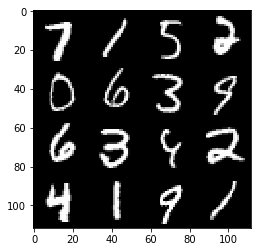

自编码恢复后的图像


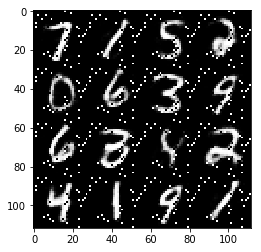

In [6]:
# 测试一下
import matplotlib.pyplot as plt

n = 4
canvas_origin = np.empty((n * 28, n * 28))
canvas_recog = np.empty((n * 28, n* 28))
for i in range(n):
    batch_x, _ = mnist.test.next_batch(n)
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    for j in range(n):
        canvas_origin[i * 28 :(i+1)*28, j*28 :(j+1)*28]= batch_x[j].reshape([28,28])
        
    for j in range(n):
        canvas_recog[i * 28 : (i +1)*28, j * 28:(j+1)*28] = g[j].reshape([28,28])
        
print("原始图像")
plt.figure(figsize=(n, n))
plt.imshow(canvas_origin, origin="upper", cmap="gray")
plt.show()

print("自编码恢复后的图像")
plt.figure(figsize=(n,n))
plt.imshow(canvas_recog, origin="upper", cmap="gray")
plt.show()